In [9]:
import numpy as np
import json

import os
import sys
sys.path.append('../../solvers/')
sys.path.append('../../src/')

from helper_functions import prettify_results, get_hyperparameter_list, read_process_results, analyze_data, read_results

import pdb
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import rcParams
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('axes', labelsize=14)
mpl.rc('axes', titlesize=14)
mpl.rc('figure', figsize=(6, 4))

In [10]:

savedir = './'
filename = 'hoop_buckinet_hyper_modes.json'
filters = None 
sortby = 'params.num_modes'
pickcols = ['x', 'loss', 'params.num_modes', 'params.l1_reg', 'params.num_nondim', 'params.num_neurons', 'params.num_layers', 'params.nullspace_loss']
df1 = read_process_results(filename=filename, savedir=savedir, filters=filters, sortby=sortby, pickcols=pickcols)

In [11]:
savedir = '../'
filename = 'hoop_buckinet_hyper_modes.json'
filters = None 
sortby = 'params.num_modes'
pickcols = ['x', 'loss', 'params.num_modes', 'params.l1_reg', 'params.num_nondim', 'params.num_neurons', 'params.num_layers', 'params.nullspace_loss']
df2 = read_process_results(filename=filename, savedir=savedir, filters=filters, sortby=sortby, pickcols=pickcols)

In [12]:
df = df1.append(df2)
len(df)

972

In [13]:
true_nondim = np.array([[2, 1, -2, 1, 0], [0, 1, 0, -1, 2]])
Pi = np.array([[0, 1, 0], [1, 0, 0], [1, 1, -1], [1, 0, -2], [0, 0, -1]]).T
names = ['m', 'R', 'b', 'g', 'w']

df['xarr'] = df.apply(lambda row: np.array(row.x), axis=1)
df['x_norm'] = df.apply(lambda row: row.xarr/np.full(row.xarr.T.shape, row.xarr[:, 1]).T, axis=1)

def get_best_errors(x, true_nondim):
    errors = []
    for j in range(true_nondim.shape[0]):
        er = np.min(np.linalg.norm(x - true_nondim[j, :], ord=2, axis=1))
        errors.append(er)
    first2errors = np.sort(np.array(errors))[:2]
    return first2errors

df['best_errors'] = df.apply(lambda row: get_best_errors(row.x_norm, true_nondim), axis=1)
df['mean_errors'] = df.apply(lambda row: np.mean(row.best_errors), axis=1)
df['final_loss'] = df.apply(lambda row: row.loss[0], axis=1) 
df['rmse'] = df.apply(lambda row: row.loss[1], axis=1) 
df['null'] = df.apply(lambda row: Pi@row.x_norm.T, axis=1)
df['norm_null'] = df.apply(lambda row: np.linalg.norm(row.null), axis=1)
df

,x,loss,params.num_modes,params.l1_reg,params.num_nondim,params.num_neurons,params.num_layers,params.nullspace_loss,xarr,x_norm,best_errors,mean_errors,final_loss,rmse,null,norm_null
89,"[[-0.13989779353141785, -0.11180482059717178, ...","[4.243626790412236e-06, 0.002045878442004323]",1,0.000000,2,20,2,0.5,"[[-0.13989779353141785, -0.11180482059717178, ...","[[1.2512679934925517, 1.0, -1.2482215171353632...","[1.4987292799334269, 2.501275351477889]",2.000002,0.000004,0.002046,"[[0.0026525888751635085, 0.012057711203219412]...",0.017719
72,"[[-0.27409878373146057, 0.12707923352718353, 0...","[8.119116500893142e-06, 0.00036650768015533686]",1,0.000000,3,20,3,1.0,"[[-0.27409878373146057, 0.12707923352718353, 0...","[[-2.156912472035237, 1.0, 2.1532392221847125,...","[1.2744216167283737, 2.7255841224598307]",2.000003,0.000008,0.000367,"[[-0.006452166667467729, 0.003029200784853636,...",0.029473
65,"[[-0.1792456954717636, -0.04806320369243622, 0...","[1.9035354853258468e-05, 0.003431193297728896]",1,0.000000,3,40,3,1.0,"[[-0.1792456954717636, -0.04806320369243622, 0...","[[3.7293746920988498, 1.0, -3.7574196232669563...","[0.11292717174015286, 3.1546812204278822]",1.633804,0.000019,0.003431,"[[0.018343080242333887, -0.0017766524001774364...",0.065616
88,"[[-0.00022753668599762022, -0.0009855976095423...","[1.5228987649607006e-05, 0.003208806738257408]",1,0.001000,3,40,2,1.0,"[[-0.00022753668599762022, -0.0009855976095423...","[[0.23086164555866084, 1.0, -0.420896152107570...","[1.6795328369866889, 2.656409305569632]",2.167971,0.000015,0.003209,"[[0.410836407610056, 1.9672189961139461, 0.993...",5.175060
63,"[[0.019360749050974846, 0.004606522154062986, ...","[0.0014444667613133788, 0.03198181465268135]",1,0.001000,3,40,4,1.0,"[[0.019360749050974846, 0.004606522154062986, ...","[[4.202899368213941, 1.0, -2.8102040843145635,...","[5.128440408621605, 5.878487915276915]",5.503464,0.001444,0.031982,"[[-1.2178433187959565, -8.533506865373791, 5.6...",58.049816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,"[[0.00012420665007084608, 0.000648073502816259...","[0.00021078417194075882, 0.014399761334061623]",9,0.001000,2,60,4,0.5,"[[0.00012420665007084608, 0.000648073502816259...","[[0.19165518962138595, 1.0, -0.587510726329458...","[2.2278616407509872, 2.596352283202177]",2.412107,0.000211,0.014400,"[[0.4742207592220387, 0.19541480975945563], [-...",1.623000
754,"[[0.23577101528644562, -0.10082012414932251, -...","[1.40606489367201e-05, 0.003691847901791334]",9,0.000000,3,40,4,0.5,"[[0.23577101528644562, -0.10082012414932251, -...","[[-2.3385312929911715, 1.0, 2.336389383031793,...","[1.2522159529665162, 1.5874754172036953]",1.419846,0.000014,0.003692,"[[0.005160714190700411, -7.047832361112283e-05...",0.022730
527,"[[0.00016043291543610394, 0.000934024166781455...","[0.00018343215924687684, 0.013210400938987732]",9,0.001000,2,40,2,0.5,"[[0.00016043291543610394, 0.000934024166781455...","[[0.17176527240075398, 1.0, -1.006091828747022...","[1.3217373775963115, 1.9840680915282622]",1.652903,0.000183,0.013210,"[[0.1938936134823402, -0.20097402174434376], [...",1.464986
743,"[[-0.7375460863113403, -0.3675641119480133, 0....","[2.0035364286741242e-05, 0.004314325284212828]",9,0.000000,2,60,2,0.5,"[[-0.7375460863113403, -0.3675641119480133, 0....","[[2.0065780698841884, 1.0, -2.011132692066789,...","[0.01470171234238114, 0.16648233104615462]",0.090592,0.000020,0.004314,"[[-0.004587946313284741, -0.001848409188830557...",0.006887


In [14]:
Pi@true_nondim.T

array([[0, 0],
       [0, 0],
       [0, 0]])

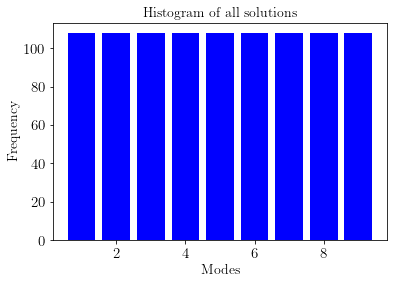

In [15]:
bins = np.linspace(0.5, 9.5, 10)
plt.hist(df['params.num_modes'].tolist(), bins=bins, rwidth=0.8, color='b') 
plt.title("Histogram of all solutions")
plt.xlabel('Modes')
plt.ylabel('Frequency')
plt.show()

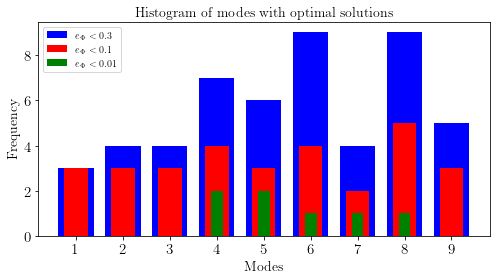

In [18]:

# df = df.sort_values(by='mean_errors')
me = [0.3, 0.1, 0.01]
df = df.sort_values(by='mean_errors')
df_best1 = df[(df['mean_errors'] < 0.2) & (df['params.num_nondim']==2)]
df_best2 = df[(df['mean_errors'] < 0.1) & (df['params.num_nondim']==2)]
df_best3 = df[(df['mean_errors'] < 0.01) & (df['params.num_nondim']==2)]

fig = plt.figure(figsize=(7, 4))
plt.hist(df_best1['params.num_modes'].tolist(), bins=bins, rwidth=0.75, color='b') 
plt.hist(df_best2['params.num_modes'].tolist(), bins=bins, rwidth=0.5, color='r') 
plt.hist(df_best3['params.num_modes'].tolist(), bins=bins, rwidth=0.25, color='g') 
plt.title("Histogram of modes with optimal solutions")
plt.xlabel('Modes')
plt.ylabel('Frequency')
plt.legend(['$e_\Phi < '+str(m)+'$' for m in me])
plt.xticks(np.arange(1, 10))
plt.tight_layout()
plt.show()

fig.savefig('histogram_modes.pdf')

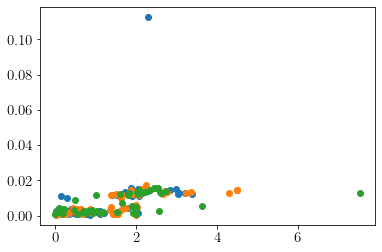

,x,loss,params.num_modes,params.l1_reg,params.num_nondim,params.num_neurons,params.num_layers,params.nullspace_loss,xarr,x_norm,best_errors,mean_errors,final_loss,rmse,null,norm_null
479,"[[0.7901142239570618, 0.5524774789810181, -0.7...","[3.8698436810591375e-07, 0.0006187534891068935]",4,0.000000,2,40,4,0.5,"[[0.7901142239570618, 0.5524774789810181, -0.7...","[[1.430129288553694, 1.0, -1.4300497764923508,...","[0.5556380978958361, 1.139831875141049]",0.847735,3.869844e-07,0.000619,"[[7.403684137957667e-05, -2.0374980894466432e-...",0.000210
457,"[[-0.08872849494218826, -0.354123592376709, 0....","[3.97410644836782e-07, 0.0006272270693443716]",4,0.000000,2,60,3,0.5,"[[-0.08872849494218826, -0.354123592376709, 0....","[[0.25055798837542803, 1.0, -0.250693714140289...","[0.5015201533427763, 3.4984799399354034]",2.000000,3.974106e-07,0.000627,"[[0.00021780082434419423, 0.000111229842544968...",0.000627
781,"[[-0.0001279243006138131, 0.13182304799556732,...","[2.8227639177202946e-06, 0.0006576996529474854]",4,0.000001,2,40,4,1.0,"[[-0.0001279243006138131, 0.13182304799556732,...","[[-0.0009704243875328591, 1.0, 0.0006525530313...","[0.005831615122803051, 0.006036834051799692]",0.005934,2.822764e-06,0.000658,"[[0.0024632136375939417, 0.0017266124084440726...",0.003506
126,"[[-4.835027357330546e-05, 0.4119732081890106, ...","[3.883156750816852e-06, 0.0007527139387093484]",4,0.000001,2,60,3,0.5,"[[-4.835027357330546e-05, 0.4119732081890106, ...","[[-0.00011736266488262185, 1.0, -6.81632105500...","[0.00019362445870979065, 0.01419262028507434]",0.007193,3.883157e-06,0.000753,"[[-0.0002016313189422414, -0.00016679603635494...",0.000458
504,"[[0.8931082487106323, 0.29430878162384033, -0....","[4.1980965761467814e-06, 0.0009214362362399697]",4,0.000000,2,20,3,1.0,"[[0.8931082487106323, 0.29430878162384033, -0....","[[3.034595990588296, 1.0, -3.033658303633162, ...","[0.13310588712331012, 2.0782149645655847]",1.105660,4.198097e-06,0.000921,"[[0.0062180999100389656, 0.00138359205340155],...",0.008806
771,"[[0.37487494945526123, -0.15972645580768585, -...","[3.5847369872499257e-06, 0.0009320335229858756]",4,0.000000,2,20,4,0.5,"[[0.37487494945526123, -0.15972645580768585, -...","[[-2.3469809529024976, 1.0, 2.349294215230233,...","[0.03202672713723917, 3.972882025005109]",2.002454,3.584737e-06,0.000932,"[[-0.004796968689701586, 0.00377089898614813],...",0.017295
829,"[[0.7605823278427124, 0.5236572623252869, -0.7...","[9.45900353599427e-07, 0.0009540126193314791]",4,0.000000,2,20,4,1.0,"[[0.7605823278427124, 0.5236572623252869, -0.7...","[[1.452443005307261, 1.0, -1.4525535281897661,...","[0.39766528832138404, 1.094441932773789]",0.746054,9.459004e-07,0.000954,"[[0.0002981613704655106, 0.0002642167352924218...",0.000608
99,"[[0.02768983505666256, 0.1511932909488678, -0....","[3.982143880421063e-06, 0.0009570429683662951]",4,0.000001,2,20,4,1.0,"[[0.02768983505666256, 0.1511932909488678, -0....","[[0.18314195612044062, 1.0, -0.190648884679408...","[0.004987088562055867, 0.3733749152840644]",0.189181,3.982144e-06,0.000957,"[[-0.0031780945181596465, 0.002453247819091286...",0.010406
48,"[[0.07573984563350677, 0.24589255452156067, -0...","[2.8259664759389125e-06, 0.0010004666401073337]",4,0.000001,2,20,4,0.5,"[[0.07573984563350677, 0.24589255452156067, -0...","[[0.3080200853615747, 1.0, -0.3080247515842432...","[0.04807776563519543, 0.6155163672770753]",0.331797,2.825966e-06,0.001000,"[[-9.223364807098289e-05, -0.00280656895593578...",0.014425
46,"[[0.5459709167480469, 0.27281782031059265, -0....","[5.207758931646822e-06, 0.0010065492242574692]",4,0.000001,2,20,2,1.0,"[[0.5459709167480469, 0.27281782031059265, -0....","[[2.0012289377815566, 1.0, -1.9996904169179617...","[0.0016297476846404407, 0.18753684733719397]",0.094583,5.207759e-06,0.001007,"[[0.00043684641675056923, -0.00070656535073487...",0.002953


In [17]:
p = [
'params.num_modes',
'params.l1_reg',
'params.num_nondim',	
'params.num_modes',	
'params.num_neurons',	
'params.num_layers',	
'params.nullspace_loss']

fig = plt.figure()
for i in range(4, 7):
    dfa = df[(df[p[0]]==i) & (df[p[2]]==2)]
    plt.plot(dfa['mean_errors'], dfa['rmse'], '.', markersize=12)
plt.show()
dfa = df[(df[p[0]]==4) & (df[p[2]]==2)]
dfa.sort_values(by='rmse')
# df1.sort_values(by='rmse')
# df1['x_norm'].tolist()


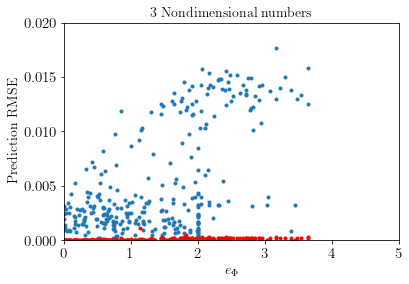

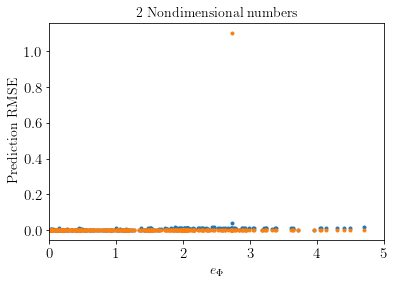

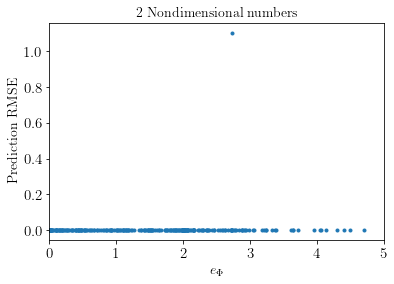

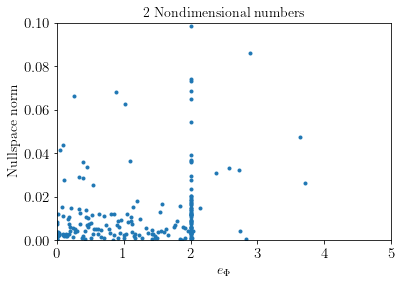

In [388]:
fig = plt.figure()

dfnumdim3 = df[(df[p[2]]==3)]
plt.plot(dfnumdim3['mean_errors'], dfnumdim3['rmse'], '.')
plt.plot(dfnumdim3['mean_errors'], dfnumdim3['final_loss'], 'r.')
plt.xlabel('$e_\Phi$')
plt.ylabel('Prediction RMSE')
plt.title('3 Nondimensional numbers')
plt.xlim([0, 5])
plt.ylim([0, .02])
plt.show()

dfnumdim2 = df[(df[p[2]]==2)]
plt.plot(dfnumdim2['mean_errors'], dfnumdim2['rmse'], '.')
plt.plot(dfnumdim2['mean_errors'], dfnumdim2['final_loss'], '.')
plt.xlabel('$e_\Phi$')
plt.ylabel('Prediction RMSE')
plt.title('2 Nondimensional numbers')
plt.xlim([0, 5])
plt.show()

fig = plt.figure()
plt.plot(dfnumdim2['mean_errors'], dfnumdim2['final_loss'], '.')
plt.xlabel('$e_\Phi$')
plt.ylabel('Prediction RMSE')
plt.title('2 Nondimensional numbers')
plt.xlim([0, 5])
plt.show()


fig = plt.figure()
plt.plot(dfnumdim2['mean_errors'], dfnumdim2['norm_null'], '.')
plt.xlabel('$e_\Phi$')
plt.ylabel('Nullspace norm')
plt.title('2 Nondimensional numbers')
plt.xlim([0, 5])
plt.ylim([0, .1])
plt.show()

In [390]:

a = dfnumdim2[dfnumdim2['norm_null']<0.001].sort_values(by='norm_null')['null'].tolist()
i = 0
print(a[i])
np.sum(a[i], axis=1)

[[ 7.40368414e-05 -2.03749809e-05]
 [ 7.95120613e-05  6.52824544e-05]
 [-1.64472371e-04 -1.97402463e-05]]


array([ 5.36618605e-05,  1.44794516e-04, -1.84212617e-04])

In [392]:
dfon2 = df[(df['mean_errors']<2.001) & (df['mean_errors'] > 1.999)]
dfon2['x_norm'].tolist()

[array([[ 0.69442861,  1.        , -0.69440153, -0.30563966,  1.30561733],
        [-1.01060364,  1.        ,  1.01056422, -2.01086621,  3.01035551]]),
 array([[ -6.11321275,   1.        ,   6.11740497,  -7.12071667,
           8.12195217],
        [ 12.11599706,   1.        , -12.11792938,  11.11649968,
         -10.11552599],
        [  1.14062381,   1.        ,  -1.1400977 ,   0.14054339,
           0.85945032]]),
 array([[ 0.25055799,  1.        , -0.25069371, -0.74908849,  1.74912307],
        [ 4.99514285,  1.        , -4.99465979,  3.99477102, -2.99501795]]),
 array([[-1.96746666,  1.        ,  1.96459977, -2.96793424,  3.97270697],
        [ 0.53663838,  1.        , -0.53683627, -0.4629552 ,  1.46286265]]),
 array([[ 1.06932378,  1.        , -1.06912473,  0.06959158,  0.93028118],
        [ 4.3125213 ,  1.        , -4.31278458,  3.3117735 , -2.31377312]]),
 array([[ 4.23832161,  1.        , -4.23376289,  3.23618579, -2.23727091],
        [ 0.46707321,  1.        , -0.46724337, 